# <center>Exercise - Calculate possibility of specific Iris sort</center>

# Step 1: Load the libraries

In [1]:
# pandas to load data
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Step 2: Load a Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal-length','sepal-width','petal-length','petal-width','Species'])

# Step 3: Get to Know Your Data
Investigate the dataset.

Find out how many records are available, all they all clean, how many classes they represent.

Create diagrams to visualize the set and its descriptive statistics.

In [3]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df_setosa = df.loc[(df["Species"] == "Iris-setosa")]
df_versicolor = df.loc[(df["Species"] == "Iris-versicolor")]
df_virginica = df.loc[(df["Species"] == "Iris-virginica")]

In [5]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.groupby('Species').mean()

,sepal-length,sepal-width,petal-length,petal-width
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [8]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Step 4: Visualize the Dataset Statistics
1. Draw Box-Whisker Plots
2. Draw Histograms
3. Draw Multivariate Plots

### Box-Whisker Plot

sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

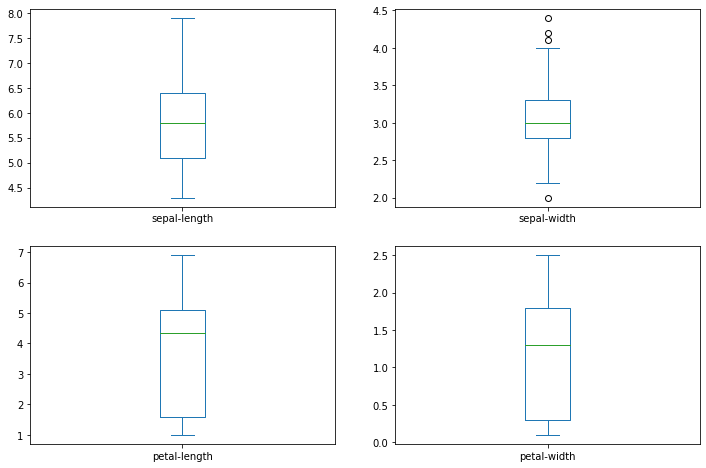

In [9]:
df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

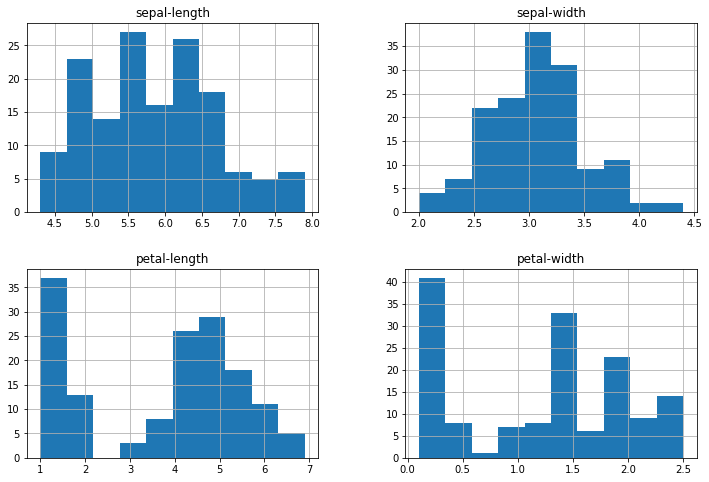

In [10]:
df.hist(figsize=(12,8))

array([[<AxesSubplot:xlabel='sepal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='sepal-width'>,
        <AxesSubplot:xlabel='petal-width', ylabel='sepal-width'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-length'>,
        <AxesSubplot:xlabel='petal-width', ylabel='petal-length'>],
       [<AxesSubplot:xlabel='sepal-length', ylabel='petal-width'>,
        <AxesSubplot:xlabel='sepal-width', ylabel='petal-width'>,
        <AxesSubplot:xlabel='petal-length', ylabel='petal-

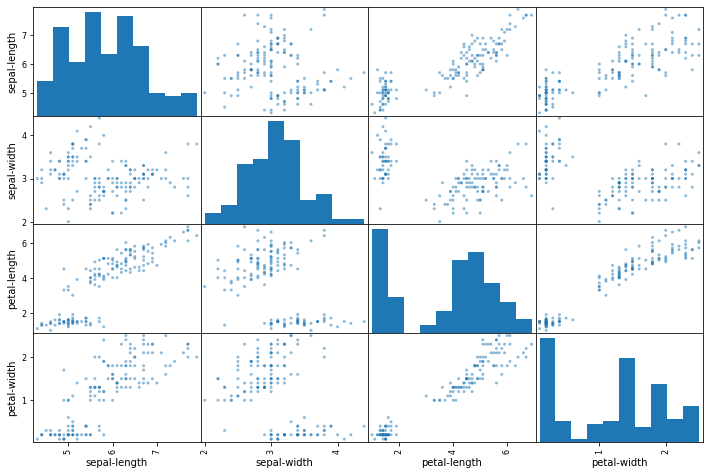

In [11]:
scatter_matrix(df, figsize=(12,8))

# Step 5 - Train the dataset
Now let's try to train a model.

1. Divide the dataset into X and y
2. Divide both into two subsets: training set and test set
3. Implement Bayes algorithm for training with the training sub-set
4. Estimate how accurate is the model with the test sub-set

### Split the Dataset

In [12]:
# Convert the dataset into two arrays
array = df.values
# Create two (sub) arrays from it
X = array[:,0:4] # data without class
y = array[:,4]   # just class

In [13]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.3

# Initial value for randomization
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)


### Choose a model

In [14]:
# Choose a model for fitting the data.
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
# Check how good the fit of the model is on the train data.
model.score(X_train, y_train)

0.9809523809523809

In [16]:
# Check how good the fit of the model is on the test data.
model.score(X_test, y_test)

0.8888888888888888

In [17]:
# Test on the test data, try prediction
prediction = model.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

In [18]:
prediction.shape

(45,)

# Step 6: Evaluation
We need a metrics for the model evaluation.

The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [19]:
# Set the metrix
scoring = 'accuracy'

#### Now we can try the model on our validation set.

In [20]:
prediction = model.predict(X_test)

In [21]:
X_test

array([[5.9, 3.0, 5.1, 1.8],
       [5.4, 3.0, 4.5, 1.5],
       [5.0, 3.5, 1.3, 0.3],
       [5.6, 3.0, 4.5, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [4.5, 2.3, 1.3, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [5.6, 2.7, 4.2, 1.3],
       [4.8, 3.4, 1.6, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [6.7, 3.0, 5.0, 1.7],
       [6.0, 3.4, 4.5, 1.6],
       [5.2, 4.1, 1.5, 0.1],
       [7.2, 3.6, 6.1, 2.5],
       [5.2, 3.4, 1.4, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [5.1, 3.8, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.8, 2.7, 3.9, 1.2],
       [6.9, 3.2, 5.7, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [6.0, 2.2, 5.0, 1.5],
       [7.2, 3.0, 5.8, 1.6],
       [6.0, 3.0, 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.1, 5.6, 2.4],
       [6.2, 2.8, 4.8, 1.8],
       [5.7, 2.6, 3.5, 1.0],
       [4.6, 3.6, 1.0, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.4, 2

In [22]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, prediction))

0.8888888888888888


In [23]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, prediction))

[[12  0  0]
 [ 0 13  3]
 [ 0  2 15]]


In [24]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      0.81      0.84        16
 Iris-virginica       0.83      0.88      0.86        17

       accuracy                           0.89        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.89      0.89      0.89        45



# Step 7: Testing

In [25]:
# Testing with new data
# m = array[[[5] [3] [1] [0]]]
m = [[5.7,1.0,5.6,2.6]]
k = [[5.4, 3.7, 1.5, 0.2]]
my_prediction = model.predict(m)
my_prediction2 = model.predict(k)
print("First flower: "+ str(my_prediction[0]))
print("Second flower: "+str(my_prediction2[0]))

First flower: Iris-virginica
Second flower: Iris-setosa


In [26]:
# Calculate the accuracy of the model with the test set
print(accuracy_score(y_test, prediction))

0.8888888888888888


In [27]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['virginia', 'serosa', 'versicolor']
print("\n" + "#"*40)


########################################


In [28]:
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, model.predict(X_train), target_names=class_names))
print("#"*40 + "\n")


Classifier performance on training dataset

              precision    recall  f1-score   support

    virginia       1.00      1.00      1.00        38
      serosa       0.94      1.00      0.97        34
  versicolor       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

########################################



In [29]:
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))


Classifier performance on test dataset

              precision    recall  f1-score   support

    virginia       1.00      1.00      1.00        12
      serosa       0.87      0.81      0.84        16
  versicolor       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45



The results are not perfect, f1-score differ in the two sub-sets.

More methods can be tried.

# Step 8: Improvement

In [30]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
# We store each trained model into array called models[]
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# See the various parameters of each model and their default values
#models

We will traing the models several times each, in randomly generated splits.

A pseudo-random generator is used (in means, not totally random, but using a very large repeatable sequence of options).

A seed is an initial value that is fed into the pseudo random number generator as a start of the process of random number generation. 

If it is not specified, it is selected randomly. As we want to use the same randomization procedure for our six trainings, we want to make it fixed and known. Then the results of different tests are directly comparable.

In [32]:
# Give a fixed value for seed to be used in all tests
seed = 7

# Give fixed value for the number of repeted trainings of one model
num_repeat = 10

In [33]:
# Set the metrix
scoring = 'accuracy'

In [34]:
# Run all the algorithms and store their results in results[] and names in names[]
# For each we use the specific parameters preliminary stored in modelss[]
results = []
names = []
for name, model in models:
    # prepare randomization of splits
    kfold = model_selection.KFold(n_splits=num_repeat, random_state=seed, shuffle=True)
    
    # implement the model and calculate a score based on 'accuracy' (scoring)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    
    # store the result of this method in array results[]
    results.append(cv_results)
    
    # store the name of this method in array names[]
    names.append(name)
    
    # tell what you have done so far
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)   
# repeat the same for next method

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

LR: 0.910000 (0.181384)
KNN: 0.935000 (0.134257)
CART: 0.870000 (0.188680)
NB: 0.860000 (0.184120)
SVM: 0.860000 (0.160935)


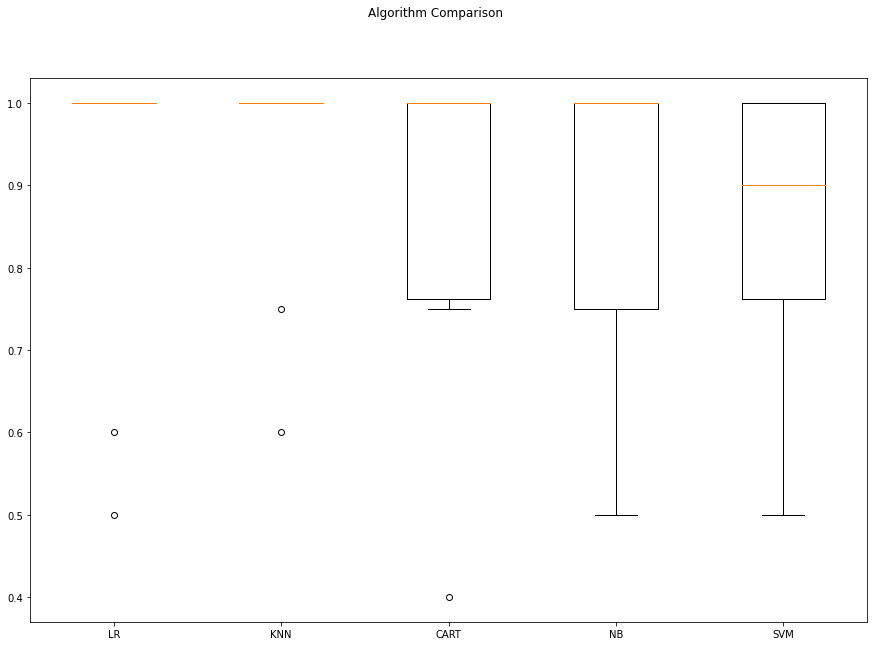

In [39]:
# Compare algorithms frame
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')

# x axis includes sub-plots
ax = fig.add_subplot(111)

# y axis result values
plt.boxplot(results)

# x axis labels
ax.set_xticklabels(names)
plt.show()

In [36]:
# Compare accuracy with KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(y_test, predictions))

0.9111111111111111
[[12  0  0]
 [ 0 15  1]
 [ 0  3 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.93      0.82      0.87        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.92      0.91      0.91        45

